<a href="https://colab.research.google.com/github/alixland/GMIC/blob/master/2023_2024_stumps_trees_forests_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stumps, trees and forests

** Ecole Centrale Nantes **

** Diana Mateus **

PARTICIPANTS: Elisa Bouchut, Alix Landemaine

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 1. Decision stumps
A decision stump is a machine learning model consisting of a one-level decision tree. That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature. Sometimes they are also called 1-rules [Wikipedia]

***a)*** Run the provided code to generate and plot a toy dataset consisting of 2D points and 4 classes



<ipython-input-3-257ef14297e9>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.get_cmap('rainbow', 4));


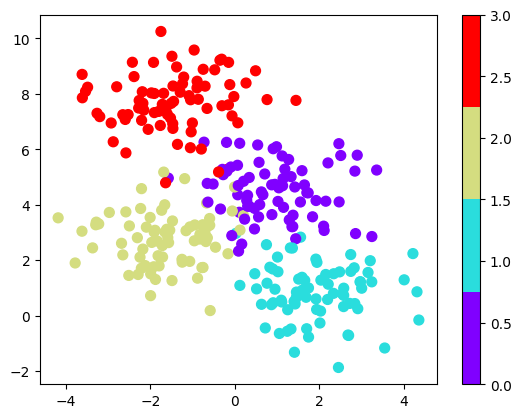

In [3]:
#a) Load and plot dataset, split in train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

n_classes = 4
X, y = make_blobs(n_samples=300, centers=n_classes,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.get_cmap('rainbow', 4));
plt.colorbar();

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)




**b)** Observe the functions **stump** and **split**.

**stump** is a function that generates the parameters of a random axis-aligned split  according to the number of features of a given dataset. The function receives the data matrix Xtrain and returns
    - the index of one randomly chosen feature (one dimension)
    - as well as a randomly chosen threshold within the min and max values of the chosen feature.

**split**  receives as input:
    - A dataset of points
    - the parameters generated by the stump function above.
The function then partitions the *dataset* in two subsets according to the threshold of the chosen dimension.
The output are two arrays, each containing the _indices_ of the points belonging to one or the other subset.

**c)** Run the split function **several times**, and display the resulting subsets as 2D scatter plots with circles of different colors for each class. Use the provided plotting functions.

Stump parameters 0 3.788152055855357
Sizes: original set: 225  left subset: (223,)  right subset: (2,)


<ipython-input-6-b53318550903>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))
<ipython-input-6-b53318550903>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))


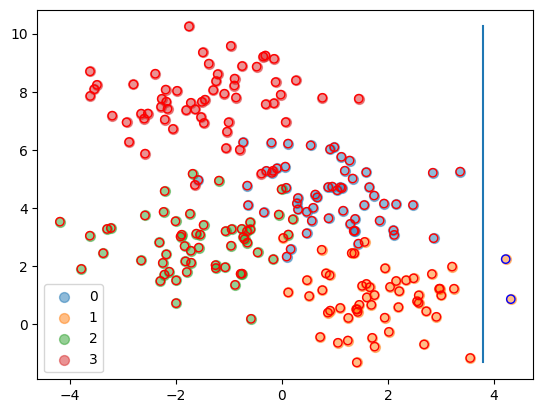

In [6]:
from random import randint, uniform

# b) Stumps and Split

def stump(X):
    f = randint(0, X.shape[1]-1) #randomly select a feature/dimension randint()
    t = uniform(np.min(X[:,f]),np.max(X[:,f])) #sample from an uniform() between the min and max values of the feature
    return f,t


def split(X, f, t):
    ind_l, = np.where(X[:,f]<=t)
    ind_r, = np.where(X[:,f]>t)
    return ind_l, ind_r

# c) Plotting a stump

def plot_stump (Xtrain,ytrain,feat,th,ind_l,ind_r):
    n_classes=np.max(ytrain)+1;
    #print(n_classes)
    for c in range(n_classes):
        X0_c=Xtrain[np.where(ytrain==c), 0] #first coordinate of points belonging to class c
        X1_c=Xtrain[np.where(ytrain==c), 1] #second coordinate of points belonging to class c
        plt.scatter(X0_c,X1_c, s=50,alpha=0.5,cmap=plt.cm.get_cmap('rainbow', 4),label=str(c))

    #plt.axis('equal')

    #draw the points on the left and right child as circles around the original training dataset
    plt.scatter(Xtrain[ind_l, 0], Xtrain[ind_l, 1], c='none', edgecolor='r')
    plt.scatter(Xtrain[ind_r, 0], Xtrain[ind_r, 1], c='none', edgecolor='b')

    #draw threshold line
    if feat == 0:
        plt.plot([th,th],[np.min(Xtrain[:,1]),np.max(Xtrain[:,1])])
    elif feat == 1:
        plt.plot([np.min(Xtrain[:,0]),np.max(Xtrain[:,0])],[th,th])
    leg = plt.legend();


feat, th = stump(Xtrain)
print('Stump parameters', feat, th)
ind_l,ind_r = split(Xtrain, feat, th)
print('Sizes: original set:', len(ytrain),
      ' left subset:' ,  ind_l.shape,
      ' right subset:', ind_r.shape)


plot_stump(Xtrain,ytrain,feat,th,ind_l,ind_r)




**d)** Implement a function ***class_distributions*** that given a set of points reaching a node returns the posterior class distribution of the node (approximated as the normalized histogram with #points per class).

``` python
def class_distributions(ytrain,num_classes):
```

Compute the class distributions of:
    - of the original training set (before the split),
    - of each of the 2 subsets resulting from after the split has been applied.

Plot the histograms of the children nodes

**e)** Create a function to compute the ***information_gain*** of a split. The function should receive the full training dataset (Xtrain and ytrain) and the indices of two subsets resulting from the current split.

``` python
def information_gain(ytrain,ind_left, ind_right,num_classes):
```
```Hint: ```  when computing the Entropy, ignore the classes with zero probabilities, and carry on summation using the same equation.



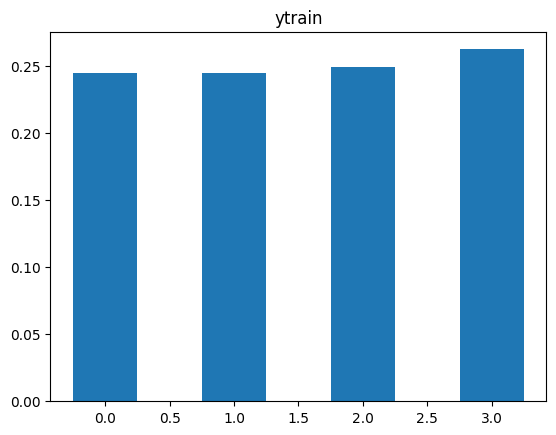

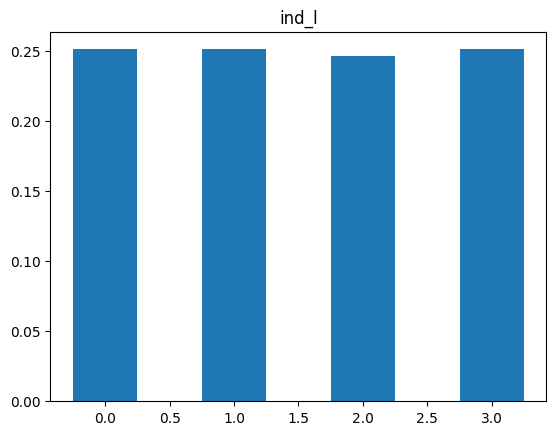

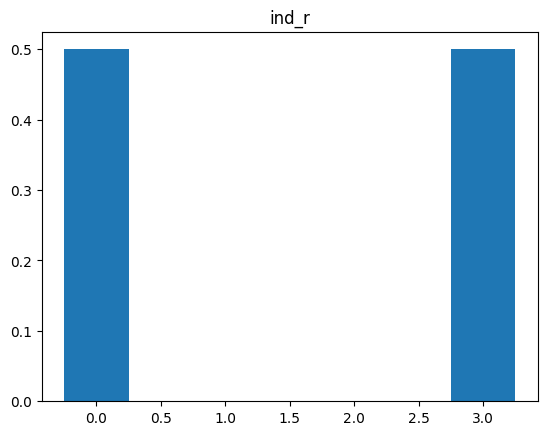

In [7]:
def class_distributions(ytrain,num_classes):
  hist=np.histogram(ytrain, bins=num_classes)
  x=np.arange(0, num_classes, 1, dtype=int)

  return (x,hist[0]/sum(hist[0]))

num_classes=4
x,hist=class_distributions(ytrain,num_classes)
plt.bar(x,hist,width=0.5)
plt.title('ytrain')
plt.show()

x,hist=class_distributions(ind_l,num_classes)
plt.bar(x,hist,width=0.5)
plt.title('ind_l')
plt.show()

x,hist=class_distributions(ind_r,num_classes)
plt.bar(x,hist,width=0.5)
plt.title('ind_r')
plt.show()


In [8]:
def information_gain(ytrain,ind_left, ind_right,num_classes):
  x,hist=class_distributions(ytrain,num_classes)
  n=len(ytrain)
  entropie_x=0
  for i in x:
    if hist[i]!=0:
      entropie_x+=-hist[i]*np.log2(hist[i])
  f_l=[]
  for i in ind_left:
    f_l.append(ytrain[i])
  f_r=[]
  for i in ind_right:
    f_r.append(ytrain[i])
  xl,hist_l=class_distributions(f_l,num_classes)
  xr,hist_r=class_distributions(f_r,num_classes)
  entropie_l=0
  for i in xl:
    if hist_l[i]!=0:
      entropie_l+=-hist_l[i]*np.log2(hist_l[i])
  entropie_r=0
  for i in xr:
    if hist_r[i]!=0:
      entropie_r+=-hist_r[i]*np.log2(hist_r[i])

  gain=entropie_x-len(f_l)/n*entropie_l-len(f_r)/n*entropie_r
  return(gain)



f,t=stump(Xtrain)
ind_left,ind_right=split(Xtrain,f,t)

print(information_gain(ytrain,ind_left,ind_right,4))



0.018244845287104905


**f)** Create a function ***train*** to perfom a *randomized node optimization*. The function receives as parameters the full training dataset (Xtrain and ytrain) as well as the number of random stumps to try. The function will
- generate the desired number of stumps,
- split the dataset according to each stump,
- evaluate the ***information gain*** for each split
- choose and then return the parameters of the best stump.

``` python
def train_stumps(Xtrain, ytrain, trials):
```

Print the progress of the information gain during the training process

**g)** Make predictions with the trained model and display the restuls

In [11]:
def train_stumps(Xtrain, ytrain, trials):
    best_gain = -1
    best_stump = None

    for i in range(trials):

        # Randomly select a feature and a threshold
        feature_index = np.random.randint(Xtrain.shape[1])
        threshold = np.random.uniform(np.min(Xtrain[:, feature_index]), np.max(Xtrain[:, feature_index]))

        # Split the dataset
        left_indices = Xtrain[:, feature_index] <= threshold
        right_indices = ~left_indices

        # Calculate information gain
        gain = information_gain(ytrain, left_indices, right_indices)

        # Print the progress of the information gain
        print(f"Trial {i+1}/{trials}, Feature: {feature_index}, Threshold: {threshold:.2f}, Info Gain: {gain:.4f}")

        # Update best stump if needed
        if gain > best_gain:
            best_gain = gain
            best_stump = (feature_index, threshold)

    return best_stump

def information_gain(y, left_indices, right_indices):

    # Calculate the entropy before the split
    initial_entropy = stats.entropy(np.bincount(y), base=2)

    # Calculate the weighted entropy after the split
    left_entropy = stats.entropy(np.bincount(y[left_indices]), base=2)
    right_entropy = stats.entropy(np.bincount(y[right_indices]), base=2)
    weighted_entropy = (np.sum(left_indices) / len(y)) * left_entropy + (np.sum(right_indices) / len(y)) * right_entropy

    # Information gain is the reduction in entropy
    return initial_entropy - weighted_entropy

def predict(X, stump):
    feature_index, threshold = stump
    predictions = np.where(X[:, feature_index] <= threshold, 0, 1)
    return predictions


# Train the Model
best_stump = train_stumps(Xtrain, ytrain, 100)  # Let's say 100 trials
print("Best Stump:", best_stump)

# Make Predictions
predictions = predict(Xtest, best_stump)

# Display Results
print("Predictions on test data:", predictions)


Trial 1/100, Feature: 1, Threshold: -0.53, Info Gain: 0.0559
Trial 2/100, Feature: 0, Threshold: -2.27, Info Gain: 0.1140
Trial 3/100, Feature: 1, Threshold: 6.23, Info Gain: 0.6229
Trial 4/100, Feature: 1, Threshold: 4.84, Info Gain: 0.6203
Trial 5/100, Feature: 0, Threshold: -0.05, Info Gain: 0.6573
Trial 6/100, Feature: 0, Threshold: -3.39, Info Gain: 0.0311
Trial 7/100, Feature: 1, Threshold: 9.23, Info Gain: 0.0350
Trial 8/100, Feature: 1, Threshold: 3.21, Info Gain: 0.6207
Trial 9/100, Feature: 1, Threshold: 4.03, Info Gain: 0.6699
Trial 10/100, Feature: 1, Threshold: 3.56, Info Gain: 0.6566
Trial 11/100, Feature: 0, Threshold: -3.30, Info Gain: 0.0354
Trial 12/100, Feature: 0, Threshold: 0.01, Info Gain: 0.6920
Trial 13/100, Feature: 1, Threshold: 5.48, Info Gain: 0.6391
Trial 14/100, Feature: 0, Threshold: 3.13, Info Gain: 0.0379
Trial 15/100, Feature: 1, Threshold: 4.74, Info Gain: 0.6563
Trial 16/100, Feature: 0, Threshold: 1.49, Info Gain: 0.3005
Trial 17/100, Feature: 0, Th

## 3. Comparing classifiers on the Caltech 101 dataset

Compare the performances of an SVM, a Decision Tree and Random Forest classifiers on the 10 classes subset of the **Caltech 101** dataset.
Focus here on the **multi-class** classification task (e.g. 5 classes).
Reuse the `loadImagesAndLabels()` and `buildDataset()` functions from the SVM lab course.


**a)** Load and split the dataset

**b)** Train three classification models on the train dataset
- a Logistic Regression
- an SVM
- a single decision tree ``sklearn.tree.DecisionTree``
- a Random Forest ``sklearn.ensemble.RandomForestClassifier``

Question: Which among these are natively multi-class classifiers?

Print the accuracy on the train and test sets for each model. ``from sklearn import metrics``

**c)** Can we use ROC curves directly in this case? How ?

**d)** Do a gridsearch with a 5-fold crossvalidation varying the hyperparameters of each model (e.g., for the SVM the ``kernel``, the ``gamma`` and ``c``, and for the tree-based models  ``max_depth``, ``max_features``, ``min_samples_leaf``, and ``n_estimators``).

``from sklearn.model_selection import GridSearchCV``

**Hint**
```
tuned_parameters = [{'max_depth': [1, 5, 10],
                     'max_features': [1, 15, 30, 45, 60],
                     'n_estimators': [1, 25, 50, 75, 100],
                     'min_samples_leaf': [3,5,10]}]
                     
```
- What are the best parameters found to maximize the area under the curve in each case?

**e)** Discuss the results and curves.

In [18]:
import random
import os
import skimage

#Keep4students
def loadImagesAndLabels(IMDIR):
  #This function glances through all subdirectories in IMDIR,
  #and creates a list of the subdirectory names, which will be
  #used as labels for all the images within.The function returns
  #the list of labels
  #
  #If the function returns an empty list, it is likely that IMDIR
  #is not defined correctly. In that case uncomment the lines below
  #to check the files that are actually being read.

  labelNamesAll = []

  for root, dirnames, filenames in os.walk(IMDIR):
      labelNamesAll.append(dirnames)
      #uncomment to check if the folder contains images
      #for filename in filenames:
      #   f = os.path.join(root, filename)
      #   if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
      #       print(f)

  labelNamesAll = labelNamesAll[0]
  return labelNamesAll

#Call the function and
#print the list of all labels/subdirectories

#Keep4students
def buildDataset (IMDIR,labelNamesAll,K=2,N=100,imHeight=100,imWidth=100,seed=50):
    #This function builds the data matrix from (a subset) of the label list.
    #Images are read using a composition of the path and the label list.
    #Parameters of this functions are:
    # K : the number of classes to consider
    # N : the maximum number of images to read from each category (the number
    #    of images per label is variable).
    # imHeight,imWidth: define the size of the target image. All read images
    #                  are resized to imHeight x imWidth
    # seed : fixes the random seed to be able to reproduce the results.
    # The function returns the data matrix X and the label vector Y.
    # Ideally, the X matrix will be of size (KxN)x(ImHeight x ImWidth) but
    # the number of rows will be less if there number of images in a given
    # category is smaller than N

    X = np.zeros([K*N,imHeight*imWidth]) #data matrix, one image per row
    Y = -np.ones([K*N,1]) #label indices initiallized to -1
    labelNames = [] #list of retained categories

    random.seed(a=seed) #comment to make each run random

    globalCount = 0 #counts the actual number of images copied to the datamatrix

    # Iterate over the number of classes
    for i in range(K):
        #Randomly choose a new category
        while True:
            lab = random.randint(0,len(labelNamesAll)-1)
            if lab not in labelNames:
                break

        #define the path to read the images of the chosen label.
        #folders are named after the class label, print the chosen label
        filedir = os.path.join(IMDIR,labelNamesAll[lab])
        print('The chosen label ',i, ' is ',labelNamesAll[lab])
        print('It will be read in',filedir)

        #save the name of the class in labelNames
        labelNames.append(labelNamesAll[lab])

        #walk through the files of the label folder,
        #read images in grayscale and resize them
        #flatten the images to a vector
        #copy each image to one row of the data matrix
        #use classCount to retain at most N images per class
        #use globalCount to keep track of the total number of images
        classCount = 0
        for filename in os.listdir(filedir):
            f = os.path.join(filedir, filename)
            if f.endswith(('.jpg')) and (classCount < N):
                image = skimage.io.imread(f, as_gray=True)
                image = skimage.transform.resize(image, [imHeight,imWidth],mode='constant')#,anti_aliasing=True)
                X[globalCount,:] = image.flatten()
                Y[globalCount,:] = i
                globalCount += 1
                classCount += 1

    #Remove the unused entries of X and Y
    print("Total number of samples",globalCount)
    X = X[:globalCount,:]
    Y = Y[:globalCount,:]

    return X,Y,labelNames



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


    ##Load and split the dataset
#----------------------------------------------------------------------------------------

IMDIR = 'C:/Users/alixl/Desktop/EI2/APSTA/caltech-101/101_ObjectCategories/101_ObjectCategories'
labelNamesAll = loadImagesAndLabels(IMDIR)
X, y, labelNames = buildDataset(IMDIR, labelNamesAll, K=5, N=100, imHeight=100, imWidth=100, seed=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    ##Train 3 classification modes
#----------------------------------------------------------------------------------------

# Initialize models
log_reg = LogisticRegression()
svm_model = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models and print accuracies
for model in [log_reg, svm_model, decision_tree, random_forest]:
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{model.__class__.__name__} - Train Accuracy: {train_acc}, Test Accuracy: {test_acc}")


    ##Grid search
#----------------------------------------------------------------------------------------

# Define parameter grids
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
param_grid_tree = {'max_depth': [1, 5, 10], 'max_features': [1, 15, 30], 'min_samples_leaf': [3, 5, 10]}
param_grid_forest = {'max_depth': [1, 5, 10], 'max_features': [1, 15, 30], 'n_estimators': [1, 25, 50], 'min_samples_leaf': [3, 5, 10]}

# Perform grid search
for model, param_grid in zip([SVC(), DecisionTreeClassifier(), RandomForestClassifier()], [param_grid_svm, param_grid_tree, param_grid_forest]):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc_ovr')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")



IndexError: ignored

**Answers to the questions**

**b)** Out of these, Logistic Regression, Decision Tree, and Random Forest are natively multi-class classifiers.

**c)**
ROC curves are typically used for binary classification tasks. For multi-class classification, you can either convert the problem into a binary classification problem using strategies like One-vs-Rest or One-vs-One, or you can compute the ROC curve for each class against all others and then average them.

